In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Mar 15 10:59:59 2019

@author: xiaofang
"""

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

tf.reset_default_graph()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:

# 模型
x = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# 模型参数
W = tf.Variable(tf.random_normal([784, 10])) # 正态分布的[784,10]的矩阵
b = tf.Variable(tf.zeros([10]))
print("b:", b, "W.shape:", W.shape)

# 正向传播的定义
pred = tf.nn.softmax(tf.matmul(x, W) + b)

# cost, 反向传播 的定义 ,将生成的pred与样本标签y进行一次交叉熵运算最小化误差cost
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# 参数 学习率 
learning_rate = 0.01

# 梯度下降优化cost
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# 训练参数
training_epochs = 20
display_step = 1
batch_size = 100

saver = tf.train.Saver()
model_path = "log/mnist_model/mnist_model.ckpt"

#启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples/batch_size)#每一轮训练多少批次
        
        # 遍历全部数据集
        for i in range(total_batch):
            # Run optimization op (backprop) and cost op (to get loss value)
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _,c = sess.run([optimizer, cost], feed_dict={x: batch_xs, y: batch_ys})
             # 计算平均值以使误差值更加平均
            avg_cost = c / total_batch
#            print("I:",i,"eopch:", epoch +1, "avg_cost:", avg_cost)
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            print("Eopch:", epoch, "avg_cost:", "{:.9f}".format(avg_cost))
    
    print("Train finished!")
    
    # 测试模型
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 计算准确 率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    
    # 存储模型 
    save_path = saver.save(sess, model_path)
    print("Model saved in file:%s" % save_path)

Instructions for updating:
Colocations handled automatically by placer.
b: <tf.Variable 'Variable_1:0' shape=(10,) dtype=float32_ref> W.shape: (784, 10)
Instructions for updating:
Use tf.cast instead.
Eopch: 0 avg_cost: 0.010666568
Eopch: 1 avg_cost: 0.006381114
Eopch: 2 avg_cost: 0.004025166
Eopch: 3 avg_cost: 0.004098273
Eopch: 4 avg_cost: 0.003392172
Eopch: 5 avg_cost: 0.003124014
Eopch: 6 avg_cost: 0.002670888
Eopch: 7 avg_cost: 0.002824862
Eopch: 8 avg_cost: 0.002083937
Eopch: 9 avg_cost: 0.002732270
Eopch: 10 avg_cost: 0.002165583
Eopch: 11 avg_cost: 0.001899385
Eopch: 12 avg_cost: 0.002492230
Eopch: 13 avg_cost: 0.001227481
Eopch: 14 avg_cost: 0.002029829
Eopch: 15 avg_cost: 0.002270788
Eopch: 16 avg_cost: 0.001150830
Eopch: 17 avg_cost: 0.002140070
Eopch: 18 avg_cost: 0.001603760
Eopch: 19 avg_cost: 0.002614030
Train finished!
Accuracy: 0.811
Model saved in file:log/mnist_model/mnist_model.ckpt


Starting 2nd session...
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from log/mnist_model/mnist_model.ckpt
Accuracy: 0.811
outputval: [0 7 4 8 1 7 8 2 8 7] predv: [[9.99901295e-01 2.27738249e-12 6.42194493e-07 1.60793073e-10
  7.79886520e-08 2.27697565e-05 8.52970231e-07 5.54408949e-12
  7.42961420e-05 6.86024208e-13]
 [1.31298264e-10 2.63444353e-11 1.28150495e-08 4.94369612e-09
  3.81613585e-09 7.68403730e-10 7.54525956e-12 9.99902725e-01
  2.06554174e-09 9.72124981e-05]
 [1.41370424e-06 6.28004182e-06 3.32519880e-06 7.17674595e-08
  9.47997272e-01 1.26389918e-04 5.02622351e-02 1.05485458e-06
  2.40367644e-05 1.57786836e-03]
 [1.57860999e-11 3.36877713e-11 3.39866233e-07 1.48270518e-09
  4.48209425e-09 8.74827411e-09 7.58641942e-14 3.53085063e-08
  9.99999642e-01 1.19142574e-09]
 [5.11769209e-14 9.99759018e-01 1.92727501e-04 3.55585435e-05
  4.32324754e-09 1.19208687e-09 1.05058575e-08 8.14527448e-06
  4.09

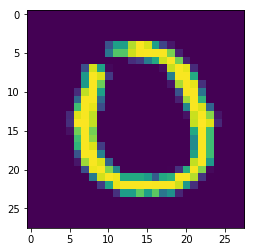

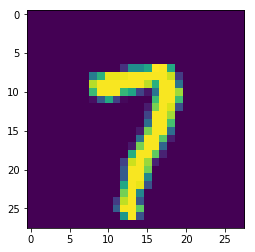

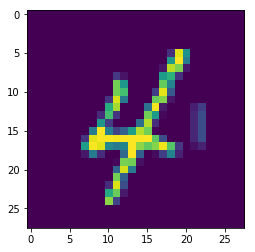

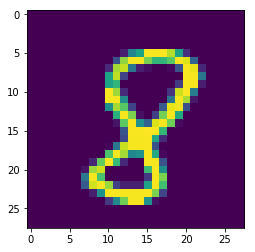

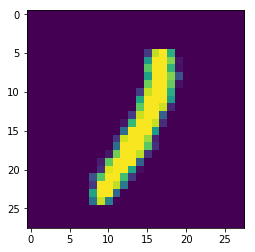

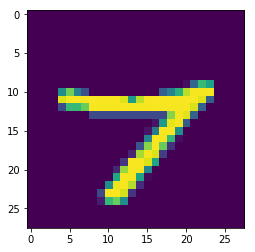

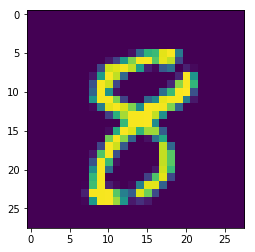

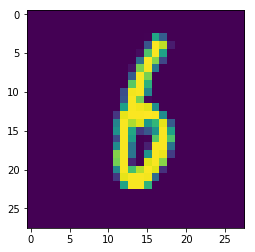

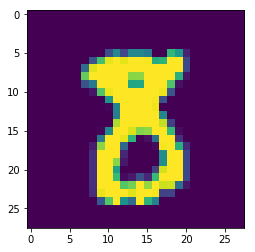

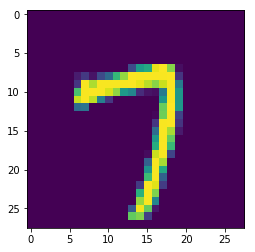

In [3]:
import pylab
#读取模型 
print("Starting 2nd session...")
with tf.Session() as sess2:
    # 初始化变量
    sess2.run(tf.global_variables_initializer())
    # 恢复模型
    saver.restore(sess2, model_path)
    
    # 测试model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # 准确率
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

    output = tf.argmax(pred, 1)
    test_range = 10
    batch_xs, batch_ys = mnist.train.next_batch(test_range) # 返回 两个手写数字图片
    outputval, predv = sess2.run([output, pred], feed_dict={x:batch_xs})
    print("outputval:", outputval, "predv:", predv, "batch_ys:", batch_ys)
    
    for i in range(test_range):
        im = batch_xs[i]
        im = im.reshape(-1, 28)
        pylab.imshow(im)
        pylab.show()